## Correlations

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import mplcursors
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [136]:
AIDS_df = pd.read_csv('Resources/AIDS_Classifications_cleaned.csv')

AIDS_df.head()

,treatment,ZDV_only_treatment,off_treatment,time,age,weight,hemophilia,homosexual_activity,drugs,race,...,karnofsky_score,therapy_prior,ZDV_last_30days,prior_ART_length,ART_history,ART_history_stratified,symptom,cd4_base,cd4_20wks,infected
0,2,1,0,948,48,89.8128,0,0,0,0,...,100,0,0,0,0,1,0,422,477,0
1,3,1,0,1002,61,49.4424,0,0,0,0,...,90,0,1,895,1,3,0,162,218,1
2,3,1,1,961,45,88.4520,0,1,1,0,...,90,0,1,707,1,3,0,326,274,0
3,3,1,0,1166,47,85.2768,0,1,0,0,...,100,0,1,1399,1,3,0,287,394,0
4,0,0,0,1090,43,66.6792,0,1,0,0,...,100,0,1,1352,1,3,0,504,353,0


In [137]:
AIDS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   treatment               2139 non-null   int64  
 1   ZDV_only_treatment      2139 non-null   int64  
 2   off_treatment           2139 non-null   int64  
 3   time                    2139 non-null   int64  
 4   age                     2139 non-null   int64  
 5   weight                  2139 non-null   float64
 6   hemophilia              2139 non-null   int64  
 7   homosexual_activity     2139 non-null   int64  
 8   drugs                   2139 non-null   int64  
 9   race                    2139 non-null   int64  
 10  gender                  2139 non-null   int64  
 11  karnofsky_score         2139 non-null   int64  
 12  therapy_prior           2139 non-null   int64  
 13  ZDV_last_30days         2139 non-null   int64  
 14  prior_ART_length        2139 non-null   

### Add Columns

In [138]:
# Calculate proportional differences in CD4 count
xcols_df = AIDS_df
xcols_df['cd4_propdif'] = (xcols_df['cd4_20wks'] - xcols_df['cd4_base']) / xcols_df['cd4_base']
xcols_df['cd4_numerical_change'] = (xcols_df['cd4_20wks'] - xcols_df['cd4_base'])

# Replace 0 and infinity values with NaN
xcols_df['cd4_numerical_change'].replace({0: np.nan, np.inf: np.nan}, inplace=True)

# Drop rows containing NaN values in either column
xcols_df.dropna(subset=['cd4_propdif', 'cd4_numerical_change'], inplace=True)

# Display the DataFrame to verify the changes
# selected_columns = corr_df[['treatment','time', 'age', 'weight', 'cd4_base', 'cd4_20wks', 'cd4_propdif', 'cd4_numerical_change']]

#print
#selected_columns.head()

### Correlation between time and cd4_20wks

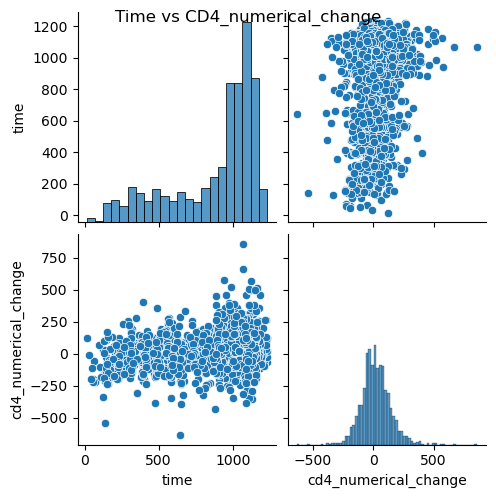

In [139]:
# Suppress all warnings
warnings.filterwarnings("ignore")

# Select the columns for plotting
scatterplot_df = xcols_df[['time', 'cd4_numerical_change']]

# Create scatterplot matrix
sns.pairplot(scatterplot_df)
plt.suptitle('Time vs CD4_numerical_change')
plt.show()

### Correlation between age and cd4_numerical_change

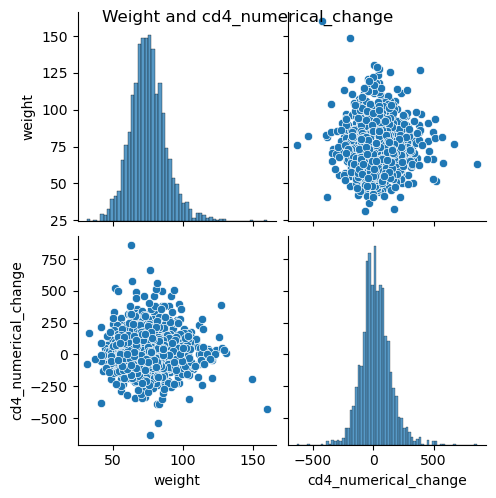

In [140]:
# Suppress all warnings
warnings.filterwarnings("ignore")

# Select the columns for plotting
scatterplot_df = xcols_df[['weight', 'cd4_numerical_change']]

# Create scatterplot matrix
sns.pairplot(scatterplot_df)
plt.suptitle('Weight and cd4_numerical_change')
plt.show()

### Correlation between prior_ART_length and cd4_numerical_change

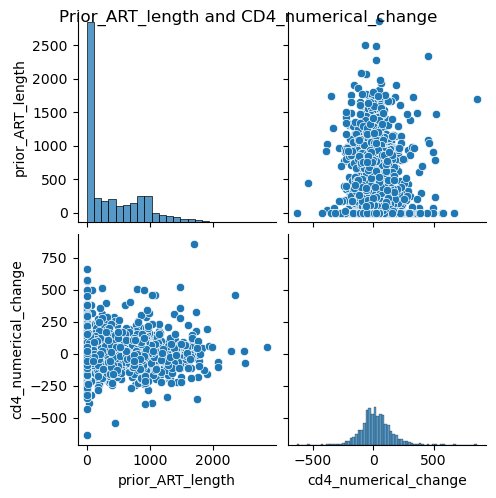

In [141]:
# Suppress all warnings
warnings.filterwarnings("ignore")

# Select the columns for plotting
scatterplot_df = xcols_df[['prior_ART_length', 'cd4_numerical_change']]

# Create scatterplot matrix
sns.pairplot(scatterplot_df)
plt.suptitle('Prior_ART_length and CD4_numerical_change')
plt.show()

### Correlation between prior_ART_length and the 4 treaments

In [142]:
# Define the conditions
condition_1 = xcols_df['cd4_propdif'] <= 1
condition_2 = xcols_df['cd4_propdif'] >= 1

# Group by treatment and calculate the correlation between prior_ART_length and the conditions for each treatment
correlation_results_1 = xcols_df.groupby('treatment').apply(lambda group: group[['prior_ART_length', 'cd4_propdif']][condition_1].corr().iloc[0, 1])
correlation_results_2 = xcols_df.groupby('treatment').apply(lambda group: group[['prior_ART_length', 'cd4_propdif']][condition_2].corr().iloc[0, 1])

# Print correlation results for each treatment
for treatment, correlation_1, correlation_2 in zip(correlation_results_1.index, correlation_results_1.values, correlation_results_2.values):
    print(f"Treatment {treatment}: Correlation between prior_ART_length and cd4_propdif <= 1: {correlation_1:.2f}")
    print(f"Treatment {treatment}: Correlation between prior_ART_length and cd4_propdif >= 1: {correlation_2:.2f}")

Treatment 0: Correlation between prior_ART_length and cd4_propdif <= 1: -0.18
Treatment 0: Correlation between prior_ART_length and cd4_propdif >= 1: -0.83
Treatment 1: Correlation between prior_ART_length and cd4_propdif <= 1: -0.14
Treatment 1: Correlation between prior_ART_length and cd4_propdif >= 1: 0.04
Treatment 2: Correlation between prior_ART_length and cd4_propdif <= 1: -0.11
Treatment 2: Correlation between prior_ART_length and cd4_propdif >= 1: 0.96
Treatment 3: Correlation between prior_ART_length and cd4_propdif <= 1: -0.09
Treatment 3: Correlation between prior_ART_length and cd4_propdif >= 1: -0.14


## Box Plots to Review Data and Check for Potential Outliers

### Box of time (Time to failure or censoring)

In [143]:
# Create box plot for time (Time to Failure of Censoring) each column with hover values
fig = px.box(AIDS_df, y='time', title="Box Plot of time (Time to failure or censoring)", 
        hover_data={'time': True, 'age': True, 'weight': True})

# Show the plot
fig.show()

### Box Plot of age (Participant's age)

In [144]:
# Create box plot for age

# Create the box plot for age with hover values
fig = px.box(AIDS_df, y='age', title="Box Plot of age (Participant's age)", hover_data={'time': True, 'age': True, 'weight': True})

# Show the plot
fig.show()

### Box Plot of weight (Participants weight)

In [145]:
# Create box plot for wtkg (Weight in Kg)

# # Create the box plot for wtkg with hover values
# Create the box plot for both age and wtkg with hover values
fig = px.box(AIDS_df, y='weight', title="Box Plot of weight (Participant's weight(kg))", 
             hover_data={'age': True, 'weight': True})
# Show the plot
fig.show()

### Box Plot for prior_ART_length (Days pre-study anti-retroviral therapy) 

In [146]:
# Create box plot for preanti (Days pre-study anti-retroviral therapy)

fig = px.box(AIDS_df, y='prior_ART_length', title="Box Plot prior_ART_length (Days pre-study anti-retroviral therapy)", 
        hover_data={'prior_ART_length': True, 'age': True, 'weight': True})

# Show the plot
fig.show()

### Box Plot of karnofsky_score (Karnof Score - scale 0 (death) to 100 (unaffected)) 

In [147]:
# Create box plot for karnof score (0 - 100 Helps monitor disease or associate complications)

fig = px.box(AIDS_df, y='karnofsky_score', title="Box Plot karnofsky_score (Karnof score - Monitor disease - or associated complications)", 
        hover_data={'karnofsky_score': True, 'age': True, 'weight': True})

# Show the plot
fig.show()

### Box Plot of cd4_base (Baseline count of cd4+Tlymphocites in the blood))

In [148]:
# Create box plot for cd4_base (Baseline cd4 cell count measurementf of cd4+Tlymphocites in the blood)

fig = px.box(AIDS_df, y='cd4_base', title="Box Plot cd4_base (Baseline count of cd4 cells in the blood)", 
        hover_data={'cd4_base': True, 'age': True, 'weight': True})

# Show the plot
fig.show()

### Box Plot of cd4_20wks (Count of cd4+Tlymphocites cells in the blood after 20 weeks))

In [149]:
fig = px.box(AIDS_df, y='cd4_20wks', title="Box Plot cd4_20wks (20 weeks count of cd4 cells in the blood)", 
    hover_data={'cd4_base': True, 'age': True, 'weight': True})

# Show the plot
fig.show()

## Data Examination

### Categorise participants based on the treatment they received

### Calculate Summary Statistics for CD4 count change by treatement group

In [150]:
# Calculate summary statistics for CD4 count change by treatment group
summary_stats = xcols_df.groupby('treatment')['cd4_numerical_change'].describe()

# Output the number of participants in each treatment group
participants_count = xcols_df['treatment'].value_counts()

# Display summary statistics and number of participants
print("Summary Statistics for Count Change by Treatment Group:")
print(summary_stats)

print("\nNumber of Participants in Each Treatment Group:")
print(participants_count)

Summary Statistics for Count Change by Treatment Group:
           count       mean         std    min    25%   50%    75%    max
treatment                                                                
0          528.0 -17.195076  105.081218 -392.0 -74.25 -17.0   45.0  378.0
1          516.0  55.081395  144.994493 -634.0 -26.00  48.0  130.0  666.0
2          522.0  19.337165  112.566864 -342.0 -50.00  15.0   83.0  860.0
3          554.0  27.196751  115.216155 -310.0 -51.00  21.5   97.0  496.0

Number of Participants in Each Treatment Group:
treatment
3    554
0    528
2    522
1    516
Name: count, dtype: int64


### CD4 Count Change (Proportionate to cd4_base) - Plot Visual

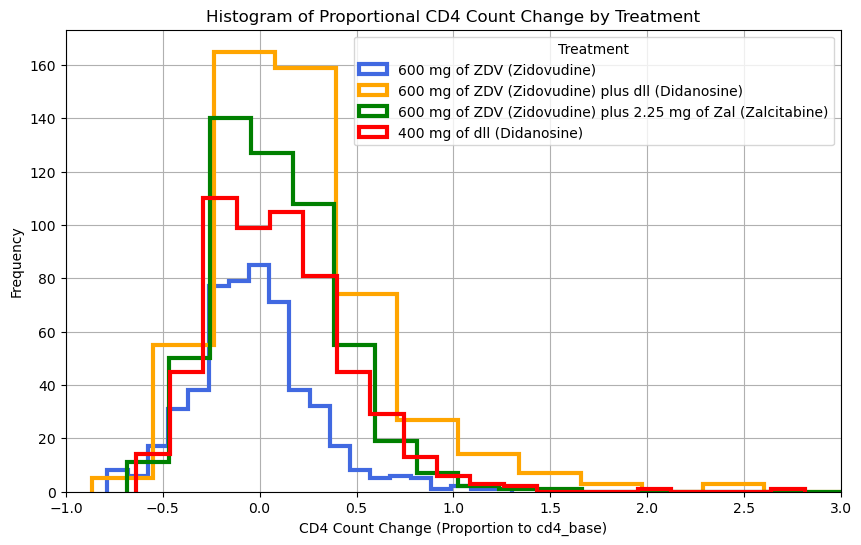

In [151]:
# Define treatment descriptions
treatment_descriptions = {
    0: '600 mg of ZDV (Zidovudine)',
    1: '600 mg of ZDV (Zidovudine) plus dll (Didanosine)',
    2: '600 mg of ZDV (Zidovudine) plus 2.25 mg of Zal (Zalcitabine)',
    3: '400 mg of dll (Didanosine)'
}

# Define the treatments
treatments = [0, 1, 2, 3]

# Define colors for treatments
colors = ['royalblue', 'orange', 'green', 'red']

# Define the x ticks positions
xticks = [-1, -0.5, 0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]

# Get the labels for the legend from the treatment descriptions
legend_labels = [treatment_descriptions[key] for key in sorted(treatment_descriptions.keys())]


# Plot histogram for each treatment
plt.figure(figsize=(10, 6))

for treatment, color in zip(treatments, colors):
    # Remove rows where cd4_base is equal to 0 for the current treatment
    treatment_df = xcols_df[(xcols_df['treatment'] == treatment) & (xcols_df['cd4_base'] != 0)]
    
    # Plot histogram using only edges
    plt.hist(treatment_df['cd4_propdif'], bins=20, histtype='step', color=color, lw=3, label=f'Treatment {treatment}')

# Add labels and title
plt.title('Histogram of Proportional CD4 Count Change by Treatment')
plt.xlabel('CD4 Count Change (Proportion to cd4_base)')
plt.ylabel('Frequency')
plt.legend(title='Treatment', loc='upper right')
plt.xticks(xticks)
plt.xlim(-1, 3)  # Set x-axis limit from -1 to 4
plt.grid(True)

# Modify the legend
plt.legend(legend_labels, title='Treatment', loc='upper right')

plt.show()


### Participants Meeting Failure Conditions by Treatment

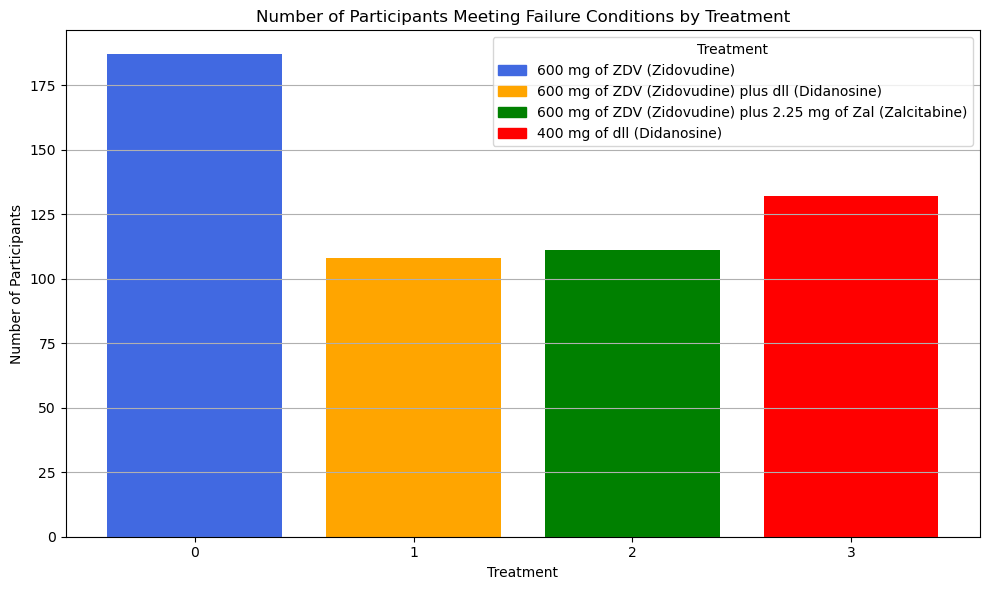

In [152]:
import matplotlib.patches as mpatches
# Define treatment descriptions
treatment_descriptions = {
    0: '600 mg of ZDV (Zidovudine)',
    1: '600 mg of ZDV (Zidovudine) plus dll (Didanosine)',
    2: '600 mg of ZDV (Zidovudine) plus 2.25 mg of Zal (Zalcitabine)',
    3: '400 mg of dll (Didanosine)'
}

# Define the treatments
treatments = [0, 1, 2, 3]

# Define colors for treatments
colors = ['royalblue', 'orange', 'green', 'red']

# Filter the DataFrame to include participants meeting at least one condition
filtered_df = xcols_df[(xcols_df['cd4_propdif'] <= -0.5) | (xcols_df['infected'] == 1)]

# Drop duplicates based on the index to ensure each participant is counted only once
filtered_df = filtered_df[~filtered_df.index.duplicated()]

# Group the filtered DataFrame by treatment and count the number of participants in each treatment group
participants_by_treatment = filtered_df.groupby('treatment').size()

# Visualize the results using a bar plot with custom colors
plt.figure(figsize=(10, 6))
bars = plt.bar(participants_by_treatment.index, participants_by_treatment.values, color=colors)

plt.title('Number of Participants Meeting Failure Conditions by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Number of Participants')
plt.xticks(treatments)

# Create custom legend patches
legend_patches = [mpatches.Patch(color=colors[i], label=treatment_descriptions[t]) for i, t in enumerate(treatments)]

# Add legend patches to the plot
plt.legend(handles=legend_patches, title='Treatment', loc='upper right')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Participants meeting conditions either CD4 cell count reduced by 50% or have become "Infected"

In [153]:
# Group by treatment and calculate the counts
treatment_counts = xcols_df.groupby('treatment').agg(
    Total_Participants=('treatment', 'size'),
    CD4_LessThanOrEqualNeg05=('cd4_propdif', lambda x: (x <= -0.5).sum()),
    Infected=('infected', 'sum')
)

# Print the results for each treatment
for treatment, counts in treatment_counts.iterrows():
    print(f"Treatment {treatment}:")
    print(f"Total Participants: {counts['Total_Participants']}")
    print(f"Participants with CD4_propdif <= -0.5: {counts['CD4_LessThanOrEqualNeg05']}")
    print(f"Participants Infected: {counts['Infected']}")
    print()

Treatment 0:
Total Participants: 528
Participants with CD4_propdif <= -0.5: 27
Participants Infected: 181

Treatment 1:
Total Participants: 516
Participants with CD4_propdif <= -0.5: 10
Participants Infected: 103

Treatment 2:
Total Participants: 522
Participants with CD4_propdif <= -0.5: 5
Participants Infected: 109

Treatment 3:
Total Participants: 554
Participants with CD4_propdif <= -0.5: 12
Participants Infected: 127



### Total Participants vs Particfipants Meeting Failing Conditions by Treatment

<Figure size 1000x1000 with 0 Axes>

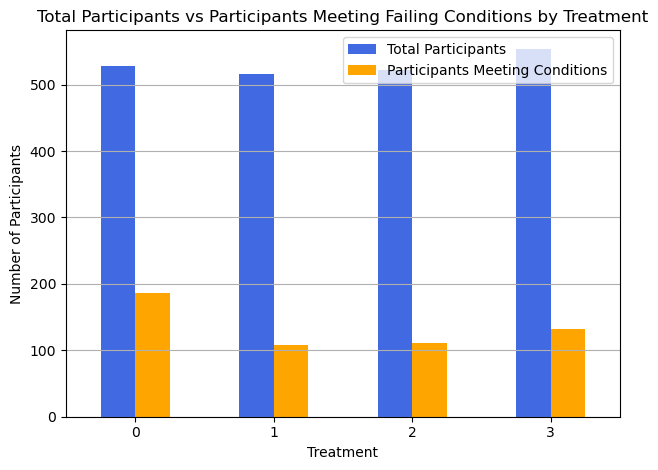

In [154]:
# Define custom colors for each treatment
colors = ['royalblue', 'orange', 'green', 'red']

# Filter the DataFrame to include participants meeting at least one condition
filtered_df = xcols_df[(xcols_df['cd4_propdif'] <= -0.5) | (xcols_df['infected'] == 1)]

# Drop duplicates based on the index to ensure each participant is counted only once
filtered_df = filtered_df[~filtered_df.index.duplicated()]

# Group the filtered DataFrame by treatment and count the number of participants meeting conditions
participants_meeting_conditions = filtered_df.groupby('treatment').size()

# Group the original DataFrame by treatment and count the total number of participants
total_participants_by_treatment = xcols_df.groupby('treatment').size()

# Create a combined DataFrame with both total case numbers and participants meeting conditions
combined_df = pd.concat([total_participants_by_treatment, participants_meeting_conditions], axis=1)
combined_df.columns = ['Total Participants', 'Participants Meeting Conditions']

# Visualize the results using a combined bar plot
plt.figure(figsize=(10, 10))
combined_df.plot(kind='bar', color=colors)
plt.title('Total Participants vs Participants Meeting Failing Conditions by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Linear Regression between Treatments and cd4_numerical change between Baseline and Week 20

In [155]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [156]:
xcols_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2120 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   treatment               2120 non-null   int64  
 1   ZDV_only_treatment      2120 non-null   int64  
 2   off_treatment           2120 non-null   int64  
 3   time                    2120 non-null   int64  
 4   age                     2120 non-null   int64  
 5   weight                  2120 non-null   float64
 6   hemophilia              2120 non-null   int64  
 7   homosexual_activity     2120 non-null   int64  
 8   drugs                   2120 non-null   int64  
 9   race                    2120 non-null   int64  
 10  gender                  2120 non-null   int64  
 11  karnofsky_score         2120 non-null   int64  
 12  therapy_prior           2120 non-null   int64  
 13  ZDV_last_30days         2120 non-null   int64  
 14  prior_ART_length        2120 non-null   int64

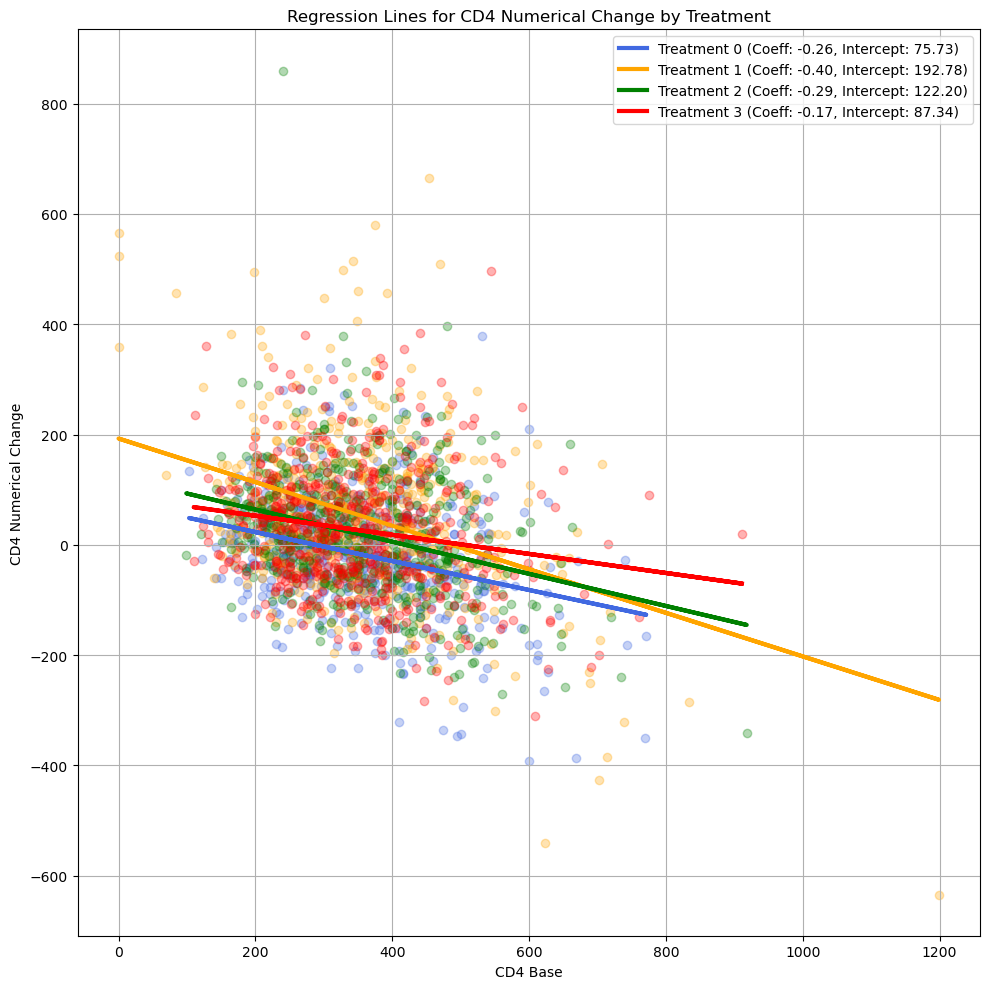

Treatment 0 - Coefficient: -0.26266126576865734, Intercept: 75.73179376297531
Treatment 1 - Coefficient: -0.3950855464371013, Intercept: 192.78095899678522
Treatment 2 - Coefficient: -0.2912786329635578, Intercept: 122.20483660574506
Treatment 3 - Coefficient: -0.17294435945396602, Intercept: 87.33799581567675


In [157]:
# Reshape X and extract y
X = xcols_df['cd4_base'].values.reshape(-1, 1)
y = xcols_df['cd4_numerical_change']

# Define treatments and corresponding colors
treatments = [0, 1, 2, 3]
colors = ['royalblue', 'orange', 'green', 'red']

# Fit a linear regression model for each treatment
coefficients = []
intercepts = []
plt.figure(figsize=(10, 10))
for treatment, color in zip(treatments, colors):
    X_treatment = X[xcols_df['treatment'] == treatment]
    y_treatment = y[xcols_df['treatment'] == treatment]
    model = LinearRegression().fit(X_treatment, y_treatment)
    coefficients.append(model.coef_[0])
    intercepts.append(model.intercept_)
    plt.scatter(X_treatment, y_treatment, color=color, alpha=0.3)

    # Plot the regression line
    plt.plot(X_treatment, model.predict(X_treatment), color=color, linewidth=3, label=f'Treatment {treatment} (Coeff: {model.coef_[0]:.2f}, Intercept: {model.intercept_:.2f})')

plt.xlabel('CD4 Base')
plt.ylabel('CD4 Numerical Change')
plt.title('Regression Lines for CD4 Numerical Change by Treatment')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print coefficients and intercepts
for treatment, coef, intercept in zip(treatments, coefficients, intercepts):
    print(f"Treatment {treatment} - Coefficient: {coef}, Intercept: {intercept}")